# EDA

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**Unamed: 0 Column has no meaning will be deleted (No useful information in it)**

In [165]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [166]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [167]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [169]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [170]:
df.isna().mean()

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

**86% Of New_Price data is null so we will drop this column**

In [171]:
df.drop(['New_Price'],axis=1,inplace=True)

In [172]:
df.isna().mean()

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
Price                0.000000
dtype: float64

In [173]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


**In milage column there are inconsistancy in the data (km/kg), (kmpl) we have to unify the unit**

In [ ]:
def milageFix(x):
    if type(x) == str:
        parts = x.split()
        if parts[-1] == 'km/kg':
            return float(parts[0])*1.   
        else:
            return float(parts[0])
    else:
        return np.nan
    
df['Mileage'] = df['Mileage'].apply(milageFix)

In [175]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


**We have to remove the CC from the Engine column to make it numirical**

In [176]:
def engineFix(x):
    if type(x) == str:
        parts = x.split()
        return float(parts[0])
    else: return np.nan
df['Engine'] = df['Engine'].apply(engineFix)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


**Same as Engine we will do it to power remove bhp**

In [177]:
def powerFix(x):
    if isinstance(x, str):
        s = x.strip()
        parts = s.split()
        if len(parts) == 0:
            return np.nan
        first = parts[0].strip().lower()
        if first == 'null':
            return np.nan
        try:
            return float(parts[0])
        except ValueError:
            return np.nan
    else:
        return np.nan

df['Power'] = df['Power'].apply(powerFix)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [178]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


**Name has too many unique values so I have to divide it, I can divide it into brand, model so when doing encoding the cols do not increase by too much**

In [179]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])
df['Model'] = df['Name'].apply(lambda x: x.split()[1]) 

In [180]:
df.drop(['Name'], axis=1, inplace=True)

In [181]:
print(df['Brand'].nunique())
print(df['Model'].nunique())

31
212


**This is not that bad as 1876 unique name values**

In [182]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [183]:
df.describe(include='O')

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,6019,6019,6019,6019,6019,6019
unique,11,5,2,4,31,212
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,790,3205,4299,4929,1211,353


In [184]:
print(df['Seats'].quantile(0))
print(df['Seats'].quantile(0.25))
print(df['Seats'].quantile(0.50))
print(df['Seats'].quantile(0.75))
print(df['Seats'].quantile(0.90))
print(df['Seats'].quantile(0.99))
print(df['Seats'].quantile(0.999))
print(df['Seats'].quantile(0.9999))
print(df['Seats'].quantile(0.99999999))

#df[df['Seats']==0]
df.drop(df[df['Seats']==0].index, inplace=True)


0.0
5.0
5.0
5.0
7.0
8.0
9.0
10.0
10.0


In [185]:
print(df['Seats'].quantile(0))
df[df['Seats']==4]

2.0


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
41,Kochi,2014,19698,Petrol,Manual,First,25.400,624.0,37.50,4.0,1.53,Tata,Nano
112,Bangalore,2014,25500,Petrol,Manual,First,25.400,624.0,37.50,4.0,2.15,Tata,Nano
124,Coimbatore,2017,32684,Petrol,Automatic,First,21.900,624.0,37.48,4.0,3.23,Tata,Nano
148,Mumbai,2013,23000,Petrol,Automatic,First,11.050,2894.0,444.00,4.0,37.00,Audi,RS5
228,Kochi,2017,26327,Petrol,Automatic,First,16.820,1998.0,189.08,4.0,35.67,Mini,Cooper
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,Mumbai,2013,30000,Diesel,Automatic,First,17.540,2993.0,313.00,4.0,45.00,BMW,6
5868,Kochi,2014,51240,Diesel,Automatic,First,8.200,2993.0,245.00,4.0,29.52,BMW,3
5926,Pune,2000,78000,Petrol,Manual,First,16.100,796.0,37.00,4.0,0.55,Maruti,800
5935,Pune,2015,59525,CNG,Manual,Second,45.164,998.0,58.20,4.0,3.10,Maruti,Alto


In [186]:
df[df['Seats']==5]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4
5,Hyderabad,2012,75000,LPG,Manual,First,29.54,814.0,55.20,5.0,2.35,Hyundai,EON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda,Amaze
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti,Swift
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai,Xcent
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti,Wagon


<Axes: >

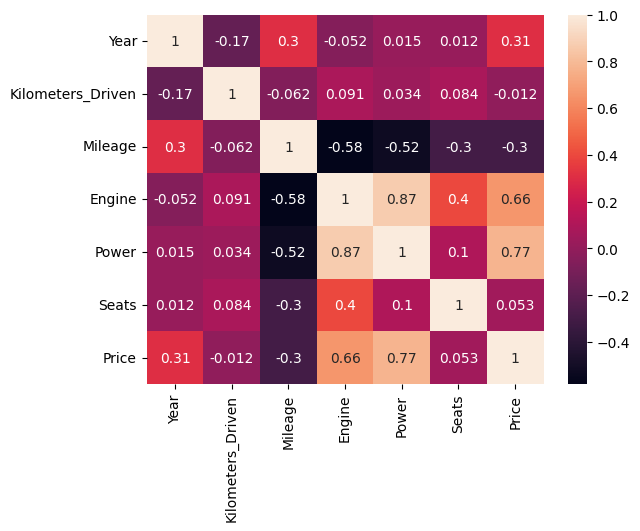

In [187]:
num_cols = df.select_dtypes(include='number')
corr_matrix = df[num_cols.columns].corr()
sns.heatmap(corr_matrix, annot=True)

**In cars with 4 seats there is some wrong data in it, i was thinking to remove it but after seeing the heat map I see that the proce is affected by the seats with 5%, so its not important so I can remove it or keep it**

In [188]:
#df.drop(['Seats'],axis=1,inplace=True)

**I think we can not do any thing with year as it it (raw year) (does not affect the price) but age may affect the price** 

In [189]:
df['Age'] = df['Year'].max() - df['Year'] + 1
# Still have the same affect as the year so it did not change any thing

In [190]:
df.drop(['Year'],axis=1,inplace=True)

**Also we can drop the power or the engine because they are high correlated so they describe the same thing**

In [191]:
df2 = df.drop(['Engine'],axis=1)

In [192]:
df2.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price,Brand,Model,Age
0,Mumbai,72000,CNG,Manual,First,37.24,58.16,5.0,1.75,Maruti,Wagon,10
1,Pune,41000,Diesel,Manual,First,19.67,126.20,5.0,12.50,Hyundai,Creta,5
2,Chennai,46000,Petrol,Manual,First,18.20,88.70,5.0,4.50,Honda,Jazz,9
3,Chennai,87000,Diesel,Manual,First,20.77,88.76,7.0,6.00,Maruti,Ertiga,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,140.80,5.0,17.74,Audi,A4,7


## Visualization

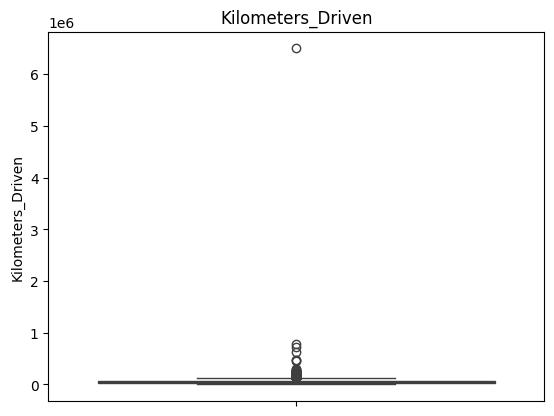

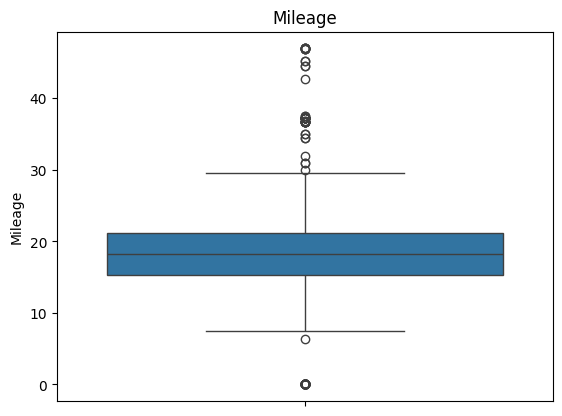

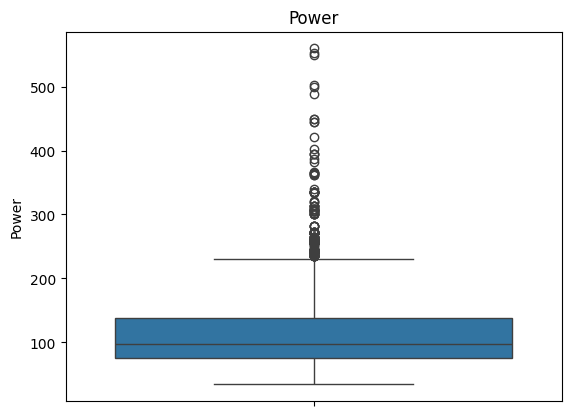

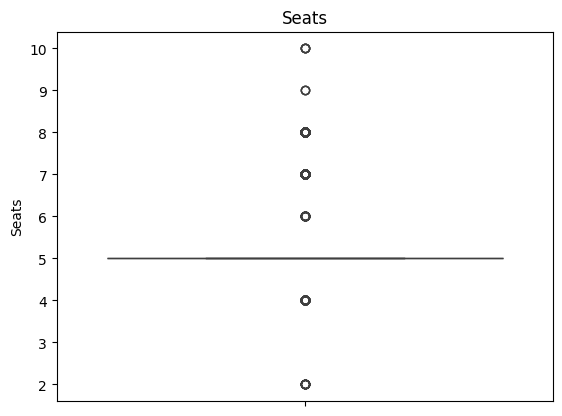

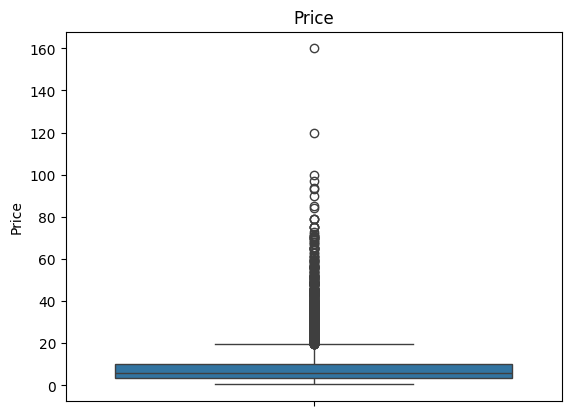

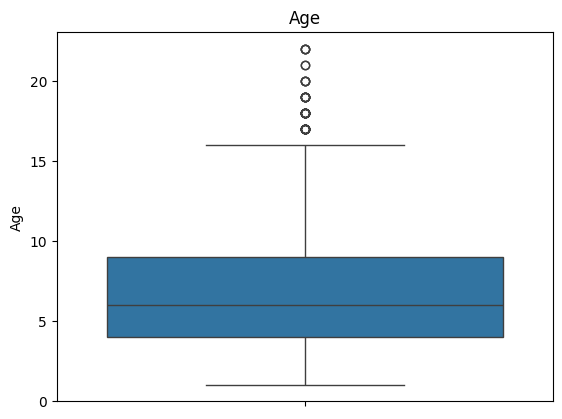

In [193]:
num_cols = df2.select_dtypes(include='number')
cat_cols = df2.select_dtypes(include='object')

for col in num_cols.columns:
    sns.boxplot(df2[col])
    plt.title(col)
    plt.show()

In [194]:
for col in ['Age','Power','Mileage','Kilometers_Driven']:
    q1 = df2[col].quantile(0.25)
    q3 = df2[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    df3 = df2[(df[col] >= lower) & (df2[col] <= upper)]


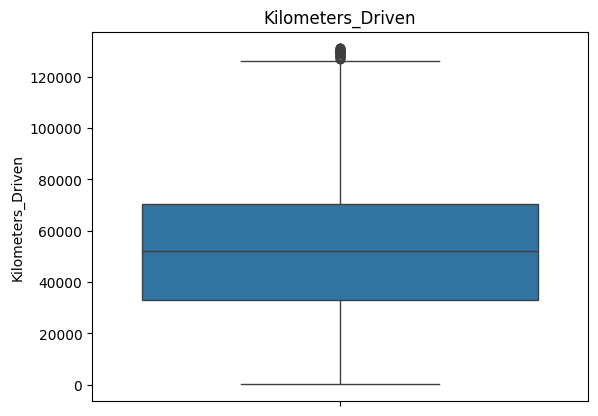

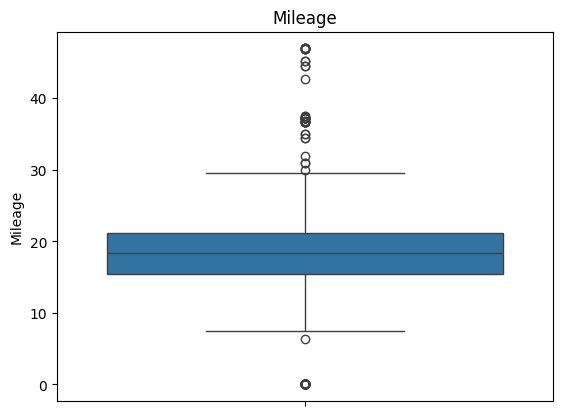

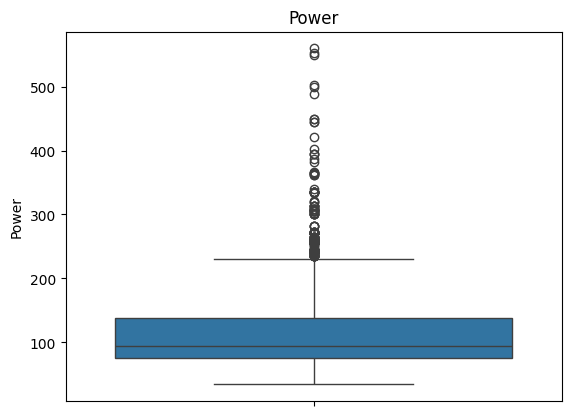

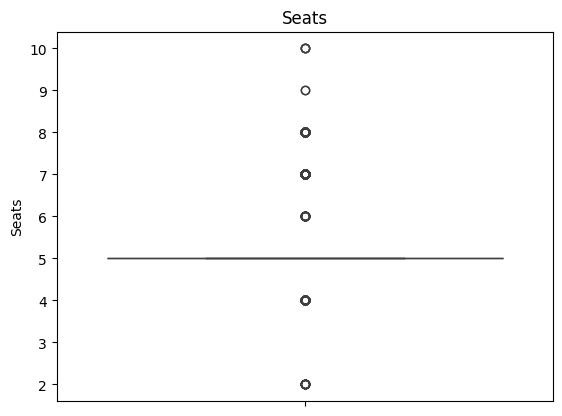

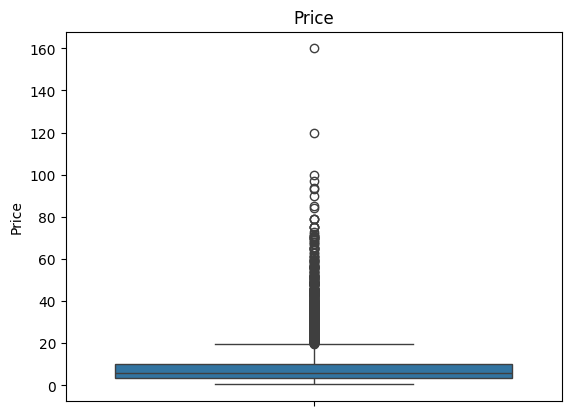

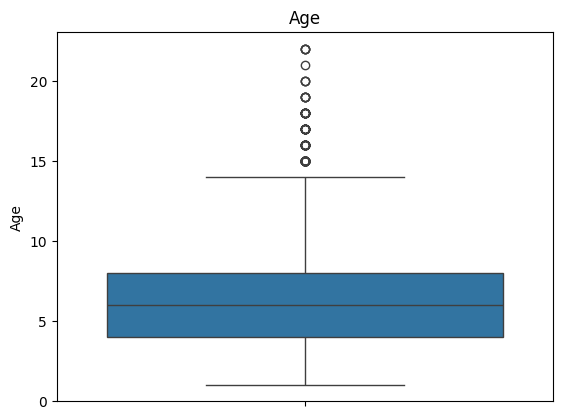

In [195]:
for col in num_cols.columns:
    sns.boxplot(df3[col])
    plt.title(col)
    plt.show()

In [196]:
df3.drop(df3[df3['Kilometers_Driven'] == df3['Kilometers_Driven'].max()].index, inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_18400\3739626882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(df3[df3['Kilometers_Driven'] == df3['Kilometers_Driven'].max()].index, inplace=True)


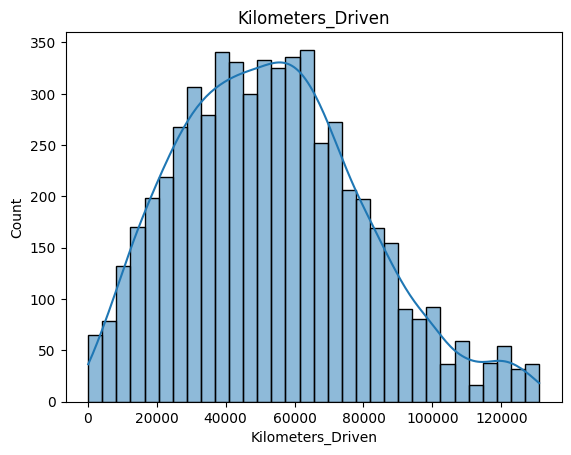

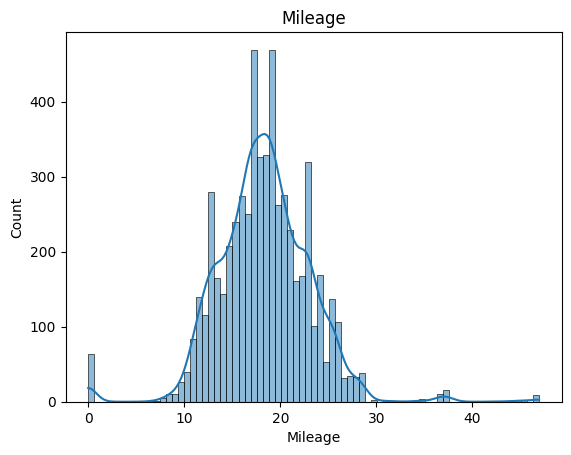

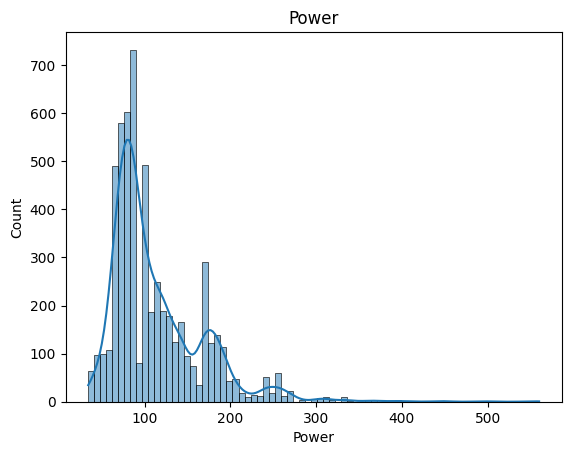

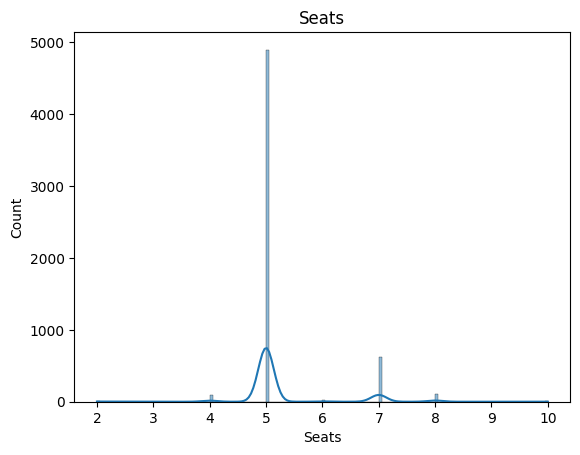

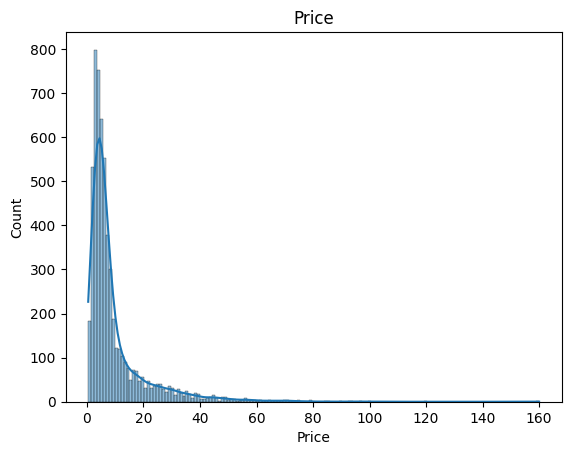

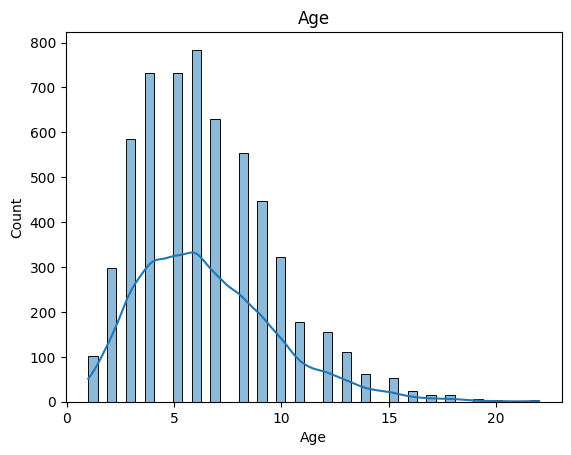

In [197]:
for col in num_cols.columns:
    sns.histplot(df3[col], kde=True)
    plt.title(col)
    plt.show()

# Pipelining

In [198]:
# We can make the seats catigorical data then encode it because not all high numbers in seats affect the proce
df3['Seats'] = df3['Seats'].astype('object')

C:\Users\ahmed\AppData\Local\Temp\ipykernel_18400\4051679405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Seats'] = df3['Seats'].astype('object')


In [199]:
x = df3.drop(['Price'],axis=1)
y = df3['Price']

In [200]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # 80% train, 20% test

#Solve skew in the testing data
y_train = np.log(y_train)
y_test = np.log(y_test)

In [201]:
numiric_cols = x.select_dtypes(exclude='O').columns.to_list()
nominal_cols = ['Location', 'Fuel_Type','Transmission','Brand','Model']
ordinal_cols = ['Owner_Type','Seats']

print(numiric_cols)
print(nominal_cols)
print(ordinal_cols)

['Kilometers_Driven', 'Mileage', 'Power', 'Age']
['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']
['Owner_Type', 'Seats']


**Definition of the pipeline**

In [202]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_pipeLine = Pipeline([
    ('num_imputer',SimpleImputer(strategy = 'median')),
    ('normal_scaler',StandardScaler())
])

ordinal_pipeLine = Pipeline([
    ('ord_imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ord_encoder', OrdinalEncoder())
])

nominal_pipLine = Pipeline([
    ('nom_imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])


In [203]:
Preprocessor = ColumnTransformer([
    ('num_pipeLine',num_pipeLine,numiric_cols),
    ('ordinal_pipeLine',ordinal_pipeLine,ordinal_cols),
    ('nom_pipeLine',nominal_pipLine,nominal_cols)
])

In [204]:
x_train_preprocessed = Preprocessor.fit_transform(x_train) # Fit = (learn first), then Transform what you have learned
x_test_preprocessed = Preprocessor.transform(x_test)


# Modelling

In [205]:
from sklearn.linear_model import LinearRegression, SGDRegressor

model = LinearRegression()
model.fit(x_train_preprocessed, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Error Evaluation**

In [206]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test_preprocessed)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean squared error: ', mean_squared_error(y_test,y_pred))

R2 Score:  0.9516180110653026
Mean squared error:  0.03650235156579334


**Applying polynomial features**

In [207]:
from sklearn.preprocessing import PolynomialFeatures

num_pipeLine = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('normal_scaler', StandardScaler())
])

ordinal_pipeLine = Pipeline([
    ('ord_imputer', SimpleImputer(strategy='most_frequent')),
    ('ord_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    #('poly', PolynomialFeatures(degree=2)),
    #('normal_scaler', StandardScaler())
])

nominal_pipLine = Pipeline([
    ('nom_imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    #('poly', PolynomialFeatures(degree=2)),
    #('normal_scaler', StandardScaler())
])

Preprocessor = ColumnTransformer(transformers=[
    ('num_pipeLine', num_pipeLine, numiric_cols),
    ('ordinal_pipeLine', ordinal_pipeLine, ordinal_cols),
    ('nom_pipeLine', nominal_pipLine, nominal_cols)
])

x_train_prep = Preprocessor.fit_transform(x_train)
x_test_prep  = Preprocessor.transform(x_test)


In [208]:
# Polynomial Regression
model = LinearRegression()
model.fit(x_train_prep, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [209]:
y_pred = model.predict(x_test_prep)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean squared error: ', mean_squared_error(y_test,y_pred))

R2 Score:  0.9559418782627808
Mean squared error:  0.03324015991056435


**Plot**

In [210]:
# # get numpy 1D arrays
# y_true = np.ravel(y_train)                 # flattens Series/DataFrame column(s) to 1D
# y_pred_draw  = np.ravel(y_pred)

# # check lengths
# if y_true.shape[0] != y_pred.shape[0]:
#     raise ValueError(f"Length mismatch: y_true {y_true.shape[0]} vs y_pred {y_pred_draw.shape[0]}")

# # plot predicted vs actual
# plt.figure(figsize=(6,6))
# plt.scatter(y_true, y_pred, alpha=0.6)
# minv = min(y_true.min(), y_pred_draw.min())
# maxv = max(y_true.max(), y_pred_draw.max())
# plt.plot([minv, maxv], [minv, maxv], 'k--', linewidth=1)  # y=x reference
# plt.xlabel("Actual y")
# plt.ylabel("Predicted y")
# plt.title("Predicted vs Actual")
# plt.show()

## Enhanec model performence by Hyper parameter tunning and Cross validation

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_pipeLine = Pipeline([
    ('preprocessor', Preprocessor),
    ('model',Ridge())
])

params = {
    'preprocessor__num_pipeLine__poly__degree':[1,2,3],
    'model__alpha' : [0.01,0.1,1]
}

grid = GridSearchCV(ridge_pipeLine, params, cv=5, scoring='r2')
grid.fit(x_train, y_train)

,estimator,"Pipeline(step...l', Ridge())])"
,param_grid,"{'model__alpha': [0.01, 0.1, ...], 'preprocessor__num_pipeLine__poly__degree': [1, 2, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_pipeLine', ...), ('ordinal_pipeLine', ...), ...]"


In [212]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_preprocessor__num_pipeLine__poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.106550,0.118799,0.013561,0.006161,0.01,1,"{'model__alpha': 0.01, 'preprocessor__num_pipe...",0.954406,0.955729,0.929003,0.958901,0.951358,0.949879,0.010715,6
1,0.052417,0.003950,0.012510,0.005308,0.01,2,"{'model__alpha': 0.01, 'preprocessor__num_pipe...",0.955541,0.955973,0.919191,0.961216,0.954790,0.949342,0.015246,9
2,0.055441,0.009313,0.012577,0.005546,0.01,3,"{'model__alpha': 0.01, 'preprocessor__num_pipe...",0.957325,0.956823,0.927886,0.961025,0.948745,0.950361,0.011931,4
3,0.041369,0.008862,0.012659,0.002581,0.10,1,"{'model__alpha': 0.1, 'preprocessor__num_pipeL...",0.954596,0.955935,0.929853,0.959520,0.951743,0.950329,0.010539,5
4,0.043421,0.006524,0.008438,0.006424,0.10,2,"{'model__alpha': 0.1, 'preprocessor__num_pipeL...",0.955619,0.956242,0.919602,0.961810,0.955285,0.949712,0.015242,7
5,0.053813,0.005452,0.017098,0.003347,0.10,3,"{'model__alpha': 0.1, 'preprocessor__num_pipeL...",0.957524,0.957149,0.927857,0.961864,0.951689,0.951217,0.012118,2
6,0.039609,0.004609,0.006756,0.005721,1.00,1,"{'model__alpha': 1, 'preprocessor__num_pipeLin...",0.953632,0.955489,0.931352,0.959215,0.952362,0.950410,0.009805,3
7,0.042983,0.003472,0.009163,0.005708,1.00,2,"{'model__alpha': 1, 'preprocessor__num_pipeLin...",0.954951,0.956171,0.918913,0.961212,0.956446,0.949539,0.015461,8
8,0.050959,0.003702,0.013925,0.001805,1.00,3,"{'model__alpha': 1, 'preprocessor__num_pipeLin...",0.957100,0.957346,0.925020,0.961519,0.957016,0.951600,0.013397,1


In [213]:
grid.best_params_

{'model__alpha': 1, 'preprocessor__num_pipeLine__poly__degree': 3}

In [214]:
grid.best_score_

np.float64(0.9516000965543221)

In [215]:
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)
print(r2_score(y_test, y_pred))

0.9603846015947672


# Saving

In [216]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(grid.best_estimator_, f)